File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
all_data          ID3                0.95            0.93            0.89            0.91            10.6           


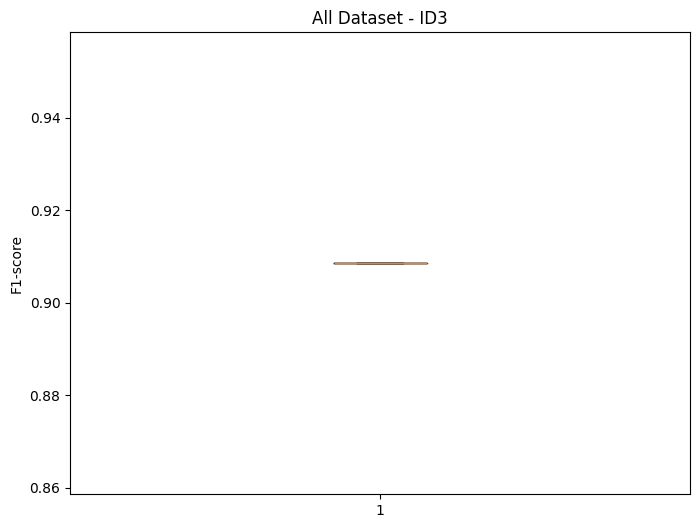

Mission accomplished!
Total operation time: =  121.2208800315857 seconds


In [2]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
import time
import warnings
warnings.filterwarnings("ignore")

# Function to create directories
def folder(f_name):
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("The folder could not be created!")

# File and folder configurations
result = "./results/results_Final.csv"
csv_files = ["all_data.csv"]  # Dataset filenames
path = ""
repetition = 10

# Creating results folder and graphs folder
folder_name = "./results/"
folder(folder_name)
folder_name = "./results/result_graph_Final/"
folder(folder_name)

# Feature selection (top 20 features selected)
usecols = ["Bwd Packet Length Std", "Flow Bytes/s", "Total Length of Fwd Packets", "Fwd Packet Length Std", "Flow IAT Std",
           "Flow IAT Min", "Fwd IAT Total", "Flow Duration", "Bwd Packet Length Max", "Flow IAT Max", "Flow IAT Mean", "Total Length of Bwd Packets",
           "Fwd Packet Length Min", "Bwd Packet Length Mean", "Flow Packets/s", "Fwd Packet Length Mean", "Total Backward Packets", "Total Fwd Packets",
           "Fwd Packet Length Max", "Bwd Packet Length Min", 'Label']

# ID3 algorithm and its selected features
ml_list = {
    "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy")
}

# Using the first 7 features for ID3
others = ["Bwd Packet Length Std", "Flow Bytes/s", "Total Length of Fwd Packets", "Fwd Packet Length Std", "Flow IAT Std", "Flow IAT Min", "Fwd IAT Total"]

algorithms_features = {
    "ID3": others
}

seconds = time.time()  # Start time for entire process

# Creating the CSV to store results
with open(result, "w", newline="", encoding="utf-8") as f:
    wrt = csv.writer(f)
    wrt.writerow(["File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"])

# Iterating through the dataset files
for j in csv_files:
    print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"))

    # Reading and preprocessing the dataset
    df = pd.read_csv(path + j, usecols=usecols)
    df = df.fillna(0)

    attack_or_not = [1 if i == "BENIGN" else 0 for i in df["Label"]]
    df["Label"] = attack_or_not

    y = df["Label"]
    del df["Label"]
    
    # Looping through the machine learning algorithm (ID3 in this case)
    for ii in ml_list:
        X = df[algorithms_features[ii]]
        precision = []
        recall = []
        f1 = []
        accuracy = []
        t_time = []

        # Repeating cross-validation 10 times
        for i in range(repetition):
            second = time.time()

            # Splitting the data into train and test sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=repetition)

            # Applying the ID3 algorithm
            clf = ml_list[ii]
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)

            # Calculating precision, recall, f1-score, and accuracy
            f_1 = f1_score(y_test, predict, average='macro')
            pr = precision_score(y_test, predict, average='macro')
            rc = recall_score(y_test, predict, average='macro')

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time() - second)))

        # Printing the average results
        print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4], ii, str(round(np.mean(accuracy), 2)), str(round(np.mean(precision), 2)),
              str(round(np.mean(recall), 2)), str(round(np.mean(f1), 2)), str(round(np.mean(t_time), 4))))

        # Writing results to CSV
        with open(result, "a", newline="", encoding="utf-8") as f:
            wrt = csv.writer(f)
            for i in range(0, len(t_time)):
                wrt.writerow([j[0:-4], ii, accuracy[i], precision[i], recall[i], f1[i], t_time[i]])

        # Generating and saving boxplot for F1-score
        plt.figure(figsize=(8, 6))  # Adjust the plot size
        plt.boxplot(f1)
        plt.title("All Dataset - " + str(ii))
        plt.ylabel('F1-score')
        plt.savefig(folder_name + j[0:-4] + str(ii) + ".pdf", bbox_inches='tight', format='pdf')
        plt.show()

print("Mission accomplished!")
print("Total operation time: = ", time.time() - seconds, "seconds")
